In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import warnings
warnings.filterwarnings("ignore")

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# https://drive.google.com/open?id=13lAtJuivd6lmcT-OUotBtqadqB4Hegy1
id = "13lAtJuivd6lmcT-OUotBtqadqB4Hegy1"

In [0]:
downloaded = drive.CreateFile({'id':id})   # replace the id with id of file you want to access
downloaded.GetContentFile('bigmart_sale.zip')

In [0]:
with zipfile.ZipFile("bigmart_sale.zip","r") as zip_ref:
    zip_ref.extractall("bigmart") 

In [8]:
os.listdir("bigmart")

['train_big_mart_data.csv', 'test_big_mart_data.csv']

In [0]:
df = pd.read_csv("bigmart/train_big_mart_data.csv", index_col=0) 
# sns.pairplot(df)

In [0]:
train_data = df.drop('Item_Identifier', axis = 1) 

In [0]:
train_label = train_data.pop('Item_Outlet_Sales')

In [0]:
label = df.Item_Outlet_Sales

In [0]:
features = df.drop(['Item_Outlet_Sales','Item_Identifier'],axis = 1)

In [14]:
features.shape

(8510, 45)

In [0]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score, auc, roc_curve

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,label,test_size = 0.2, random_state = 42)

In [17]:
Ytrain

1372    5426.2700
3846    6705.2718
333     9267.9360
1259    5851.0504
3532    1877.5560
          ...    
5734    3419.5488
5191    3621.2862
5390      61.9194
860     1649.8524
7270     194.4136
Name: Item_Outlet_Sales, Length: 6808, dtype: float64

In [0]:
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor # GBM
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis for classification
import lightgbm
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
import sklearn


First Check Machine learning Algorithms

In [0]:
models = [] 
models.append(('KNN',KNeighborsRegressor()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('xgb',XGBRegressor()))
models.append(('GBR',GradientBoostingRegressor()))
models.append(('ADA',AdaBoostRegressor()))
# models.append(('CBR',CatBoostRegressor()))

In [0]:
# sorted(sklearn.metrics.SCORERS.keys())

In [21]:
results = [] 
names = []
for name, model in models: 
  kfold = KFold(n_splits = 10, random_state = 42) 
  cv_results = cross_val_score( 
          model, Xtrain, Ytrain, cv = kfold, scoring = 'neg_mean_squared_error') # for regression RMSE
          
  mae = cross_val_score( 
          model, Xtrain, Ytrain, cv = kfold, scoring = 'neg_mean_absolute_error') # for regression RMSE
                  
  cv_results2 = cross_val_score( 
          model, Xtrain, Ytrain, cv = kfold) # for regression accuracy        
  
  rmse_score = np.sqrt(-cv_results)         
  results.append(rmse_score.mean()) 
  names.append(name)
  print(f"{name} and RMSE is {rmse_score.mean()} and MAE is {(-mae).mean()} and Accuracy {cv_results2.mean()}")

KNN and RMSE is 1193.2032367690754 and MAE is 859.5685263821803 and Accuracy 0.5008833070853714
DT and RMSE is 1531.5688741404354 and MAE is 1071.434683207653 and Accuracy 0.18003555317905984
RF and RMSE is 1172.6831464752418 and MAE is 829.2439408063661 and Accuracy 0.5212908540826747
[19:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

In [22]:
print("Choose the best model")
for name,result in zip(names,results):
  print(f"{name} -> RMSE {result}")

Choose the best model
KNN -> RMSE 1193.2032367690754
DT -> RMSE 1531.5688741404354
RF -> RMSE 1172.6831464752418
xgb -> RMSE 1072.0554321422273
GBR -> RMSE 1070.961209688077
ADA -> RMSE 1128.6727638858106


Now Check Deep learning Model, Our DNN

In [23]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [0]:
# !pip install git+https://github.com/tensorflow/docs

In [0]:
def my_model():
  model = Sequential()
  # input_shape = no of features
  model.add(Dense(90,input_shape = [45], kernel_initializer='normal',activation='relu'))
  # Dense Layer

  model.add(Dense(180, kernel_initializer='normal', activation='relu'))
  model.add(Dense(180, kernel_initializer='normal', activation='relu'))
  model.add(Dense(180, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(360, kernel_initializer='normal', activation='relu'))
  model.add(Dense(360, kernel_initializer='normal', activation='relu'))
  # model.add(Dense(360, kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))

  # output layer

  # model.add(Dense(1, kernel_initializer='normal', activation='linear')) # linear for the regression problem
  model.add(Dense(1))
  adam = tf.keras.optimizers.Adam(0.001)
  # The absolute error is the absolute value of the difference between the forecasted value and the actual value. 
  # MAE tells us how big of an error we can expect from the forecast on average
  model.compile(loss = 'mse', optimizer = adam , metrics=['mae', 'mse']) # mean squarred error and mean absloute error
  return model

In [0]:
model = my_model()
history = None

In [37]:
EPOCHS = 1000
# The patience parameter is the amount of epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  train_data, train_label,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop,tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2172186.2562,  mean_absolute_error:1046.6302,  mean_squared_error:2172186.2500,  val_loss:1284581.3860,  val_mean_absolute_error:780.3954,  val_mean_squared_error:1284581.5000,  
.........................

In [0]:
# estimat = KerasRegressor(build_fn=my_model, epochs = 200, verbose = 1)
# cv_score = cross_val_score(estimat, Xtrain, Ytrain, cv = 10)
# cv_score.mean() # RMSE

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
20,1.147730e+06,755.996643,1147730.000,1.166617e+06,770.211853,1166616.875,20
21,1.161870e+06,756.723389,1161869.625,1.150426e+06,747.461121,1150426.125,21
22,1.167074e+06,757.580261,1167074.250,1.143857e+06,758.319031,1143856.875,22
23,1.145032e+06,754.669312,1145031.875,1.182374e+06,786.726135,1182374.250,23
24,1.152240e+06,757.292969,1152239.625,1.145391e+06,758.388306,1145391.125,24


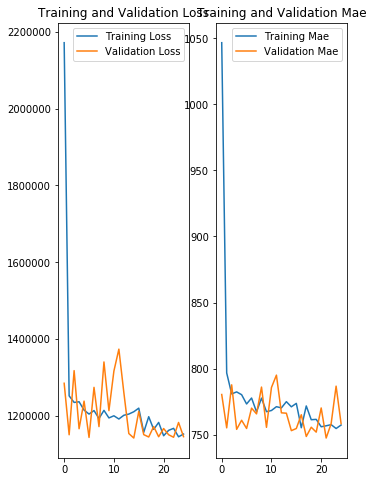

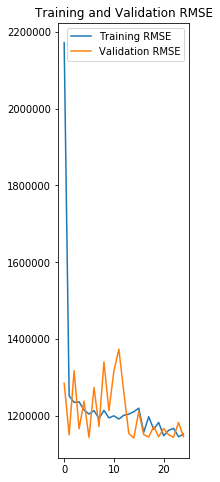

In [39]:
acc = history.history['loss']
val_acc = history.history['val_loss']

val_loss = history.history['val_mean_absolute_error']
loss = history.history['mean_absolute_error']

rmse = history.history['mean_squared_error']
val_rmse = history.history['val_mean_squared_error']

# epochs_range = range()

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 3, 2)
plt.plot( loss, label='Training Mae')
plt.plot( val_loss, label='Validation Mae')
plt.legend(loc='upper right')
plt.title('Training and Validation Mae')

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 3)
plt.plot(rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')

plt.show()

# we have overfitting

XGB and GBR are perofrming best becuase they have the lowest RMSE

In [0]:
# now we have choose an algorithm
# bagging is choose one algorithm and make more algorithms from the sample datasets
# from sklearn.ensemble import VotingRegressor, BaggingRegressor # for voating
# this is will create 500 Gradient boosting regressors and each randomly pickup the 100 samples from data set
# n_jobs mean use all cores of the PC

# bad_reg = BaggingRegressor(
#     DecisionTreeRegressor(), n_estimators = 500,
#     max_samples = 100, bootstrap = True, n_jobs = -1,
#     oob_score = True
# )
# res = bad_reg.fit(Xtrain,Ytrain)
# bad_reg.oob_score_ # 58% accuracy on test data
# RMSE = cross_val_score(bad_reg, Xtrain,Ytrain, cv = 10, scoring='neg_mean_squared_error')
# res = np.sqrt(-RMSE)
# print(res.mean())

without hyper parameter tuning

In [51]:
# without hyper parameter tuning
gbr = GradientBoostingRegressor()
kfold = KFold(n_splits=20,random_state=42)
val_score = cross_val_score(gbr,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=kfold)
rmse = np.mean(np.sqrt(-val_score)) # rmse  
val_score = cross_val_score(gbr,Xtrain,Ytrain,scoring='neg_mean_absolute_error',cv=kfold)
mae = np.mean(-val_score) # rmse  
print(f"The Root Mean Squared Error is {rmse} and Absolute Error is {mae} on Cross Validation Data")

gbr_res = gbr.fit(Xtrain,Ytrain)
y_predict = gbr.predict(Xtest)
error = mean_squared_error(Ytest,y_predict) # this error and cross validation error both are same
rmsr_error = np.sqrt(error)
mae_error = mean_absolute_error(Ytest,y_predict)
print(f"The Root Mean Squared Error is {rmsr_error} and Absolute Error is {mae_error} on Validation Data")

The Root Mean Squared Error is 1070.9362771677147 and Absolute Error is 759.9270768860988 on Cross Validation Data
The Root Mean Squared Error is 1025.4798438395133 and Absolute Error is 722.5328807417737 on Validation Data


**we have choose an model, know we do hyper parameter tuning of Gradient Boosting Regressor**

In [0]:
# our promising models are xgboost and gradient boosting regressor
# its is time taken approces so we use hit and trial hyper parameter tuning
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor()
params = {
     'alpha':[0.9,0.8,0.7], 
      'criterion':['mse','friedman_mse'],
      'learning_rate':[0.1,0.01,0.001],
      'max_depth':[3,4,5],
      'max_features': [15,20,25],
      'n_estimators':[100,200,300],
      'warm_start':[True,False],
}
model_grid_search = GridSearchCV(gbr,params,cv=10, scoring = 'neg_mean_squared_error')
# model_grid_search.fit(Xtrain,Ytrain) 
# model_grid_search = GridSearchCV(estimator= gbr,param_grid=params,scoring='neg_mean_squared_error',cv = 10)


In [0]:
def tuning_params(**params):
  gbr = GradientBoostingRegressor(**params)
  kfold = KFold(n_splits=20,random_state=42)
  val_score = cross_val_score(gbr,Xtrain,Ytrain,scoring='neg_mean_squared_error',cv=kfold)
  rmse = np.mean(np.sqrt(-val_score)) # rmse  
  val_score = cross_val_score(gbr,Xtrain,Ytrain,scoring='neg_mean_absolute_error',cv=kfold)
  mae = np.mean(-val_score) # rmse  

  gbr_res = gbr.fit(Xtrain,Ytrain)
  y_predict = gbr.predict(Xtest)
  error = mean_squared_error(Ytest,y_predict) # this error and cross validation error both are same
  rmsr_error = np.sqrt(error)
  mae_error = mean_absolute_error(Ytest,y_predict)
  print(f"The Root Mean Squared Error is {rmse} and Absolute Error is {mae} on Cross Validation Data")
  print(f"The Root Mean Squared Error is {rmsr_error} and Absolute Error is {mae_error} on Validation Data")

In [52]:
param = {
      'alpha':0.7, 
      'criterion':'friedman_mse',
      'learning_rate':0.1,
      'max_depth':5,
      'max_features': 20,
      'n_estimators':400,
      'warm_start':True}
tuning_params(**param)     

The Root Mean Squared Error is 1137.8887359045204 and Absolute Error is 807.2602754698453 on Cross Validation Data


Saving model 

In [0]:
from sklearn.externals import joblib
joblib.dump(gbr,"my_model_gbr.pkl")
my_loaded_model = joblib.load("my_model_gbr.pkl")


In [0]:
y_predict = my_loaded_model.predict(Xtest)

In [58]:
mean_absolute_error(Ytest,y_predict)

722.5328807417737

In [60]:
np.sqrt(mean_squared_error(Ytest,y_predict))

1025.4798438395133